# EDA of Haberman Cancer Survival  Dataset

In [1]:
# Dataset Details : 

########### Independent Variables / Features ########

# Age - Age of patient
# Op_Year - Year of operation
# axil_nodes_de - Positive Lymph Nodes

######### Dependent Variable / Class label #########

# Surv_status = 1: Patient survived more than 5 years AND 2: patient survived less than 5 years

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("F:/Datasets/haberman.csv")
df.shape

(306, 4)

In [4]:
df.columns

Index(['Age', 'Op_Year', 'axil_nodes_de', 'Surv_status'], dtype='object')

In [5]:
# Changing the column names
df = df.rename(columns={"Age":"age","Op_Year":"year","axil_nodes_de":"nodes","Surv_status":"status"})
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# Observations

1) No missing values are found in our dataset.

2) We need to label our class(status) in readable format( 1: "survived" , 2: "died" )

3) our dataset is imbalanced.

In [9]:
# Changing the status column
# df['survived_status'] = df['survived_status'].map({1:'survived', 2:'dead'})
df['status'] = df['status'].map(lambda x: "survived" if x==1 else "died")
df["status"].value_counts()

survived    225
died         81
Name: status, dtype: int64

# SCATTER PLOTS

Text(0.5, 1.0, 'Scatter Plot : age vs year\n')

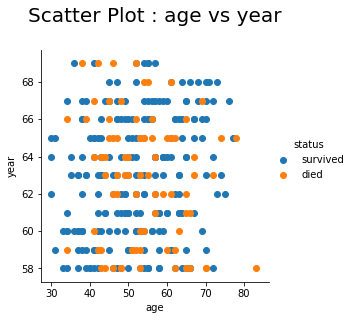

In [10]:
# Scatter plot b/w year vs age



# Observation : 

1) This scatter plot does not clear much about the dataset but we can say that most of the operatons are performed on people aged b/w 40 to 70

Text(0.5, 1.0, 'Scatter Plot : year vs nodes\n')

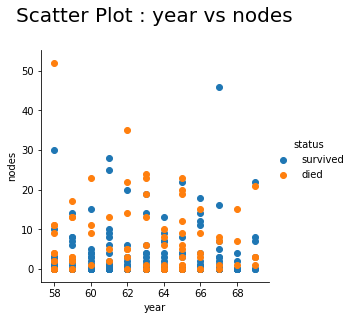

In [11]:
# Scatter plot b/w year vs  nodes
sns.FacetGrid(df, hue = "status", height = 4)\
    .map(plt.scatter, "year" , "nodes")\
    .add_legend();
plt.title("Scatter Plot : year vs nodes\n", fontdict={"fontsize" : 20})

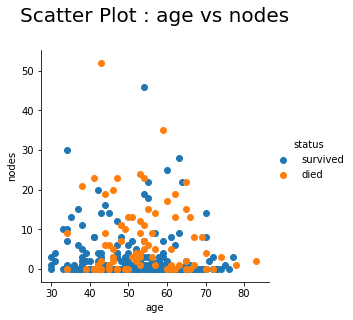

In [12]:
# Scatter plot b/w year vs  nodes
sns.FacetGrid(df, hue = "status", height = 4)\
    .map(plt.scatter, "age" , "nodes")\
    .add_legend();

plt.title("Scatter Plot : age vs nodes\n" , fontdict={"fontsize" : 20})

plt.show()

# Observations

1) Most of the patients are having axile nodes close to 0 or we can say that in b/w 0 and 5.

# PAIR PLOTS : 


					Pair plots



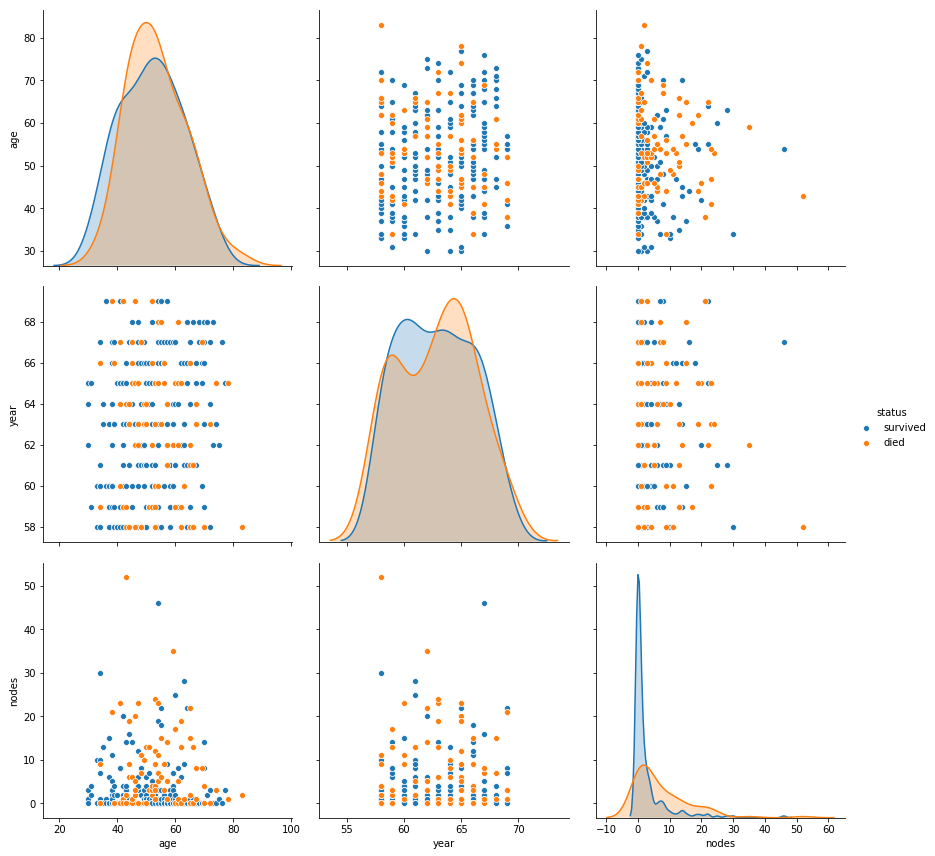

In [13]:
# Pair Plots
print("\n\t\t\t\t\tPair plots\n")
sns.pairplot(df, hue= "status" , height = 4, vars=["age","year","nodes"])
plt.show()

# Observations

1) Only axile nodes feature seems to be useful to make the prediction.

2) Patients with axile nodes close to 0 or equal to 0 are more likely to survive irrespective of their ages.

3) It is very rare to have a patient with axile nodes more than 30

# PDF and CDF

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


Text(0.5, 1.0, 'PDF and CDF plot of nodes feature\n\n')

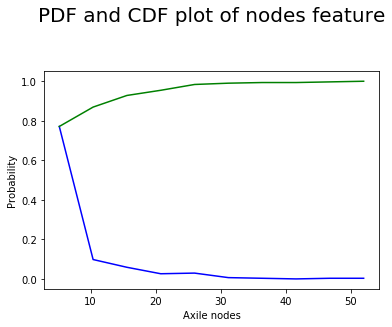

In [14]:
# PDF and CDF
counts,bin_edges = np.histogram(df["nodes"],bins= 10,density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(bin_edges)
print(pdf)

plt.plot(bin_edges[1:],pdf,"b")
plt.plot(bin_edges[1:],cdf,"g")
plt.xlabel("Axile nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF plot of nodes feature\n\n", fontdict={'fontsize' : 20})


# BOX PLOT

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

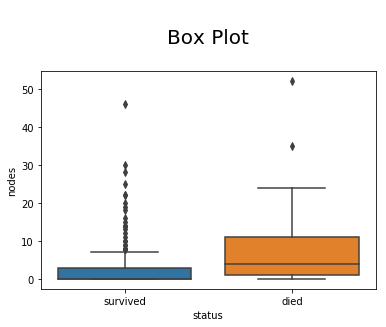

In [15]:
sns.boxplot(data = df , x= "status" , y= "nodes" )
plt.title("\nBox Plot\n" , fontdict={"fontsize" : 20})
df["nodes"].describe()

# Observation

1) Patients having axile nodes equal to 0 are more likely to  survive.

# VIOLIN PLOT

Text(0.5, 1.0, '\nViolin Plot\n')

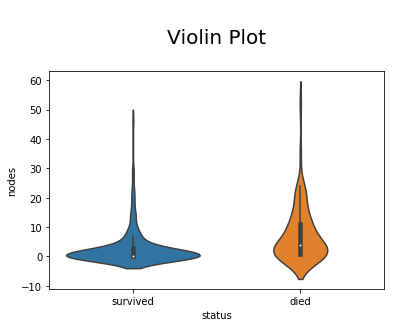

In [16]:
sns.violinplot(data = df , x = "status" , y = "nodes")
plt.title("\nViolin Plot\n" , fontdict={"fontsize" : 20})

# Observation

1) Most of the patients who survived had axile nodes =  0

2) Most of the patients who died had axile nodes >= 1

# Final Conclusions : 

1) Dataset is highly imbalanced. ( survived: 225 , died: 81)

2) Axile node is very important feature.

3) Patients having axile nodes equal to 0 are most likely to survive irrespective of their ages.

4) Patients having axile nodes greater than and equal to 1 are most likely to die.

5) It is very rare to have a patient with axile nodes more than 30

6) Most of the operatons are performed on people aged b/w 40 to 70